<a href="https://colab.research.google.com/github/ealatorr/sds510/blob/main/Module_3_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Firstly imported the necessary packages


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

I like to embed my google drive. That way I don't have to use up space on my computer and save the files to drive instead. It is also more convient when If I leave then come back to my work.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Downloade the file to the notebook and previewed it with head.

In [8]:
crime_csv = '/content/drive/MyDrive/Colab Notebooks/crimestat (1).csv'
crime_stats = pd.read_csv(crime_csv)
crime_stats.head()

/tmp/ipython-input-4235164306.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_stats = pd.read_csv(crime_csv)


,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
0,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE
1,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE
2,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT
3,201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE
4,201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE


Parsed dates from the string. I had a difficult time doing this becasue the year was returning as 2015.0 so I used AI and it suggested adding ("Int64")
which from my understanding there was missing values so Pandas makes these floats (with decimals) and the Int64 allows the integer and missing values.

In [43]:
crime_stats["OCCURRED ON"] = pd.to_datetime(crime_stats["OCCURRED ON"], errors="coerce")

crime_stats["year"] = crime_stats["OCCURRED ON"].dt.year.astype("Int64")
crime_stats["month"] = crime_stats["OCCURRED ON"].dt.month.astype("Int64")
crime_stats.head()

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,year,month,VIOLENT
0,201600000052855,2015-11-01,2016-01-09 00:00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE,2015,11,False
1,201600000594484,2015-11-01,NaT,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE,2015,11,False
2,201500002102327,2015-11-01,2015-11-01 09:00:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT,2015,11,False
3,201500002101405,2015-11-01,2015-11-01 05:00:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE,2015,11,False
4,201500002102668,2015-11-01,2015-11-01 11:50:00,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE,2015,11,False


Grouped crimes by zip and counted how many per zip. Had to add rename in there as I was getting confused since it was coming back names as inc number in the head results.

In [29]:
crimes_by_zip = crime_stats.groupby("ZIP")["INC NUMBER"].count().rename("Crime_Count_per Zip").sort_values(ascending=False)
crimes_by_zip.head(10)

,Crime_Count_per Zip
ZIP,
85015.0,6963
85008.0,6320
85009.0,5513
85041.0,5477
85051.0,5389
85017.0,5356
85035.0,4752
85043.0,4331
85032.0,4301


Crime counts per location

In [35]:
crimes_by_location = crime_stats.groupby("PREMISE TYPE")["INC NUMBER"].count().rename("Crime_Count_per_loc").sort_values(ascending=False)
crimes_by_location.head(10)

,Crime_Count_per_loc
PREMISE TYPE,
SINGLE FAMILY HOUSE,25329
APARTMENT,14957
PARKING LOT,14148
STREET / ROADWAY / ALLEY / SIDEWALK,11596
RETAIL BUSINESS,10852
VEHICLE,6844
DRIVEWAY,4609
CONVENIENCE MARKET / STORE,4270
DEPARTMENT / DISCOUNT STORE,3822


Crime counts per category

In [36]:
crimes_by_type = crime_stats.groupby("UCR CRIME CATEGORY")["INC NUMBER"].count().rename("Crime_Count_per_type").sort_values(ascending=False)
crimes_by_type.head(10)

,Crime_Count_per_type
UCR CRIME CATEGORY,
LARCENY-THEFT,66216
BURGLARY,23648
MOTOR VEHICLE THEFT,14391
DRUG OFFENSE,9572
AGGRAVATED ASSAULT,9306
ROBBERY,5640
RAPE,1981
ARSON,634
MURDER AND NON-NEGLIGENT MANSLAUGHTER,289


Plotted the Monthly crime trend

<Axes: title={'center': 'Monthly Crime Rates'}, xlabel='month'>

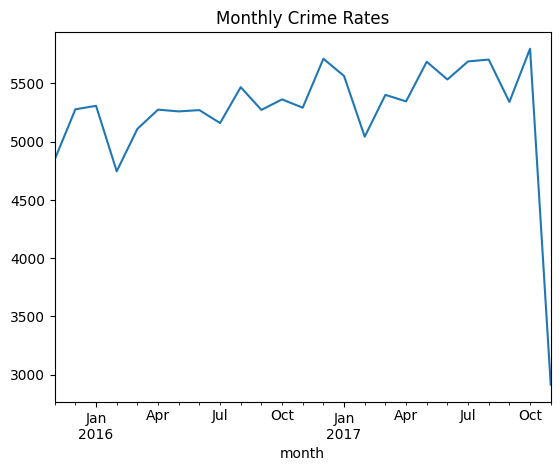

In [37]:
monthly_crime = crime_stats.groupby("month")["INC NUMBER"].count()
monthly_crime.plot(kind='line', title="Monthly Crime Rates")


Count how many crimes occured per zip code per month. Left our rename here but INC number represents the crime count. Then calculated the percent change from one month to another in order to show if crime is increasing or decreasing in certain zip codes.

In [46]:
zip_monthly = crime_stats.groupby(["ZIP", "month"])["INC NUMBER"].count().reset_index()

zip_monthly["pct_change"] = zip_monthly.groupby("ZIP")["INC NUMBER"].pct_change()
zip_monthly.head()

,ZIP,month,INC NUMBER,pct_change
0,85003.0,1,123,NaN
1,85003.0,2,108,-0.121951
2,85003.0,3,113,0.046296
3,85003.0,4,123,0.088496
4,85003.0,5,99,-0.195122


Zip codes with the largest percent of crime increase between on month to another.

In [47]:
zip_increase = zip_monthly.groupby("ZIP")["pct_change"].mean().sort_values(ascending=False)
zip_increase.head(10)

,pct_change
ZIP,
85303.0,0.645833
85260.0,0.555556
85253.0,0.516450
85257.0,0.500000
85255.0,0.342532
85392.0,0.300000
85396.0,0.250000
85202.0,0.250000
85045.0,0.245651


Zip codes with the largest percent of crime decrease between on month to another.

In [48]:
zip_decrease = zip_monthly.groupby("ZIP")["pct_change"].mean().sort_values()
zip_decrease.head(10)

,pct_change
ZIP,
85201.0,-0.500000
85323.0,-0.125000
85020.0,-0.003711
85339.0,-0.002117
85021.0,-0.001657
85034.0,-0.000693
85027.0,-0.000027
85040.0,-0.000003
85224.0,0.000000


Used the UCR FBI classifications as waht is considered violent crime. "The descending order of UCR violent crimes are murder and nonnegligent manslaughter, rape, robbery, and aggravated assault, followed by the property crimes of burglary, larceny-theft, and motor vehicle theft. Although arson is also a property crime, the Hierarchy Rule does not apply to the offense of arson. In cases in which an arson occurs in conjunction with another violent or property crime, both the arson and the additional crime are reported."
https://ucr.fbi.gov/crime-in-the-u.s/2018/crime-in-the-u.s.-2018/topic-pages/violent-crime


In [34]:
violent = ["AGGRAVATED ASSAULT", "HOMICIDE", "ROBBERY", "SEXUAL ASSAULT"]

crime_stats["VIOLENT"] = crime_stats["UCR CRIME CATEGORY"].isin(violent)

crime_stats.groupby("VIOLENT")["INC NUMBER"].count()


,INC NUMBER
VIOLENT,
False,116731
True,14946
